Text(0.5, 1.0, 'A discretely sampled continuous function')

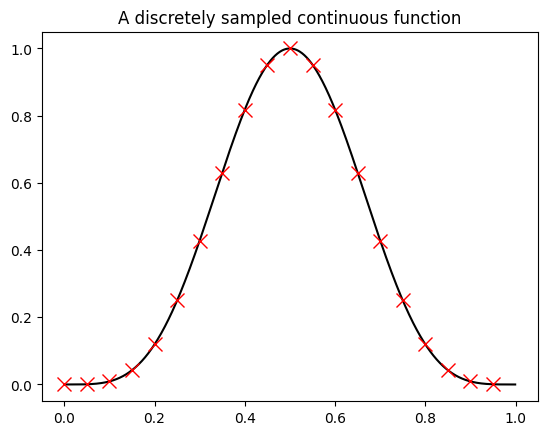

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
L = 1
N = 1000
dx = L/N
x = np.arange(N)*dx
samples = x[::50] # Sample every 100th point
f = lambda x: np.sin(np.pi*x)**4
#f = lambda x: np.sin(2*np.pi*x)
plt.plot(x, f(x), 'k-')
plt.plot(samples, f(samples), 'rx', ms=10)
plt.title('A discretely sampled continuous function')

/home/julian/Code/spectralsimulation/.venv/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/julian/Code/spectralsimulation/.venv/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


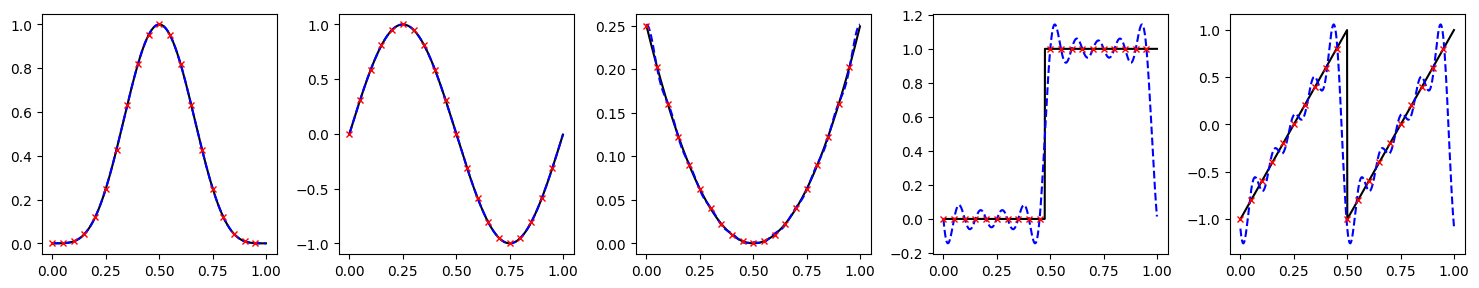

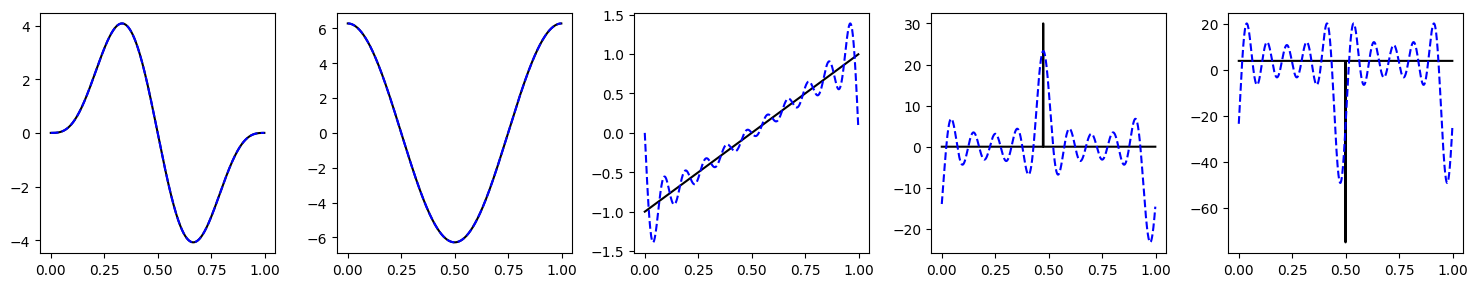

In [2]:
def dft(f_xls):
    N = len(f_xls)
    assert N%2==0 # currentl only workds for even N?
    return [sum([f_xls[l] * np.exp(-1j*2*np.pi*k*l/N)
        for l in range(N)]) for k in range(N)]

# assert that the dft function matches the numpy implementation
for a,b in zip(dft(f(samples)), np.fft.fft(f(samples))):
    assert abs(a-b)<0.0001

def fourier_interpolate(f,xs):
    c_i = dft(f(xs))
    n_c  = len(c_i)
    highest = len(c_i)//2+1
    f_interp= lambda x: (1/n_c)*sum([c_i[k] * np.exp(1j*2*np.pi*k/L*x) for k in range(-highest+1, highest)])
    return f_interp

def fourier_diff(f,xs):
    c_i = dft(f(xs))
    n_c  = len(c_i)
    highest = len(c_i)//2+1
    f_interp_deriv= lambda x: (1/n_c)*sum([1j * 2*np.pi*k/L * c_i[k] * np.exp(1j*2*np.pi*k/L*x) for k in range(-highest+1, highest)])
    return f_interp_deriv

def plot_interpolants(fs):
    fig, axs = plt.subplots(1, len(fs), figsize=(3*len(fs), 3))
    fig.tight_layout()
    for i,f in enumerate(fs):
        axs[i].plot(x, f(x), 'k-')
        axs[i].plot(x, fourier_interpolate(f, samples)(x), 'b--')
        axs[i].plot(samples, f(samples), 'rx', ms=5)

def plot_diffs(fs):
    fig, axs = plt.subplots(1, len(fs), figsize=(3*len(fs), 3))
    fig.tight_layout()
    for i,f in enumerate(fs):
        axs[i].plot(x, np.clip(np.gradient(f(x), x), -75, 30), 'k-')
        axs[i].plot(x, fourier_diff(f, samples)(x), 'b--')

fs = [
    lambda x: np.sin(np.pi*x)**4,
    lambda x: np.sin(np.pi*x*2),
    lambda x: (x-.5)**2,
    lambda x: np.heaviside(x-0.475, 0.5),
    lambda x: signal.sawtooth(4 * np.pi * x)
]

plot_interpolants(fs)
plot_diffs(fs)
